# Import Libraries

In [25]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


#  Download Stopwords

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#  Text Cleaning Function

In [9]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Load Dataset

In [10]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add Labels

In [11]:
fake['label'] = 0
true['label'] = 1

# Combine and Shuffle

In [12]:
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

# Feature Selection

In [13]:
df['text'] = df['text'].apply(clean_text)
X = df['text']
y = df['label']

# TF-IDF Vectorization

In [14]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predictions & Evaluation

In [17]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9912026726057906

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Confusion Matrix

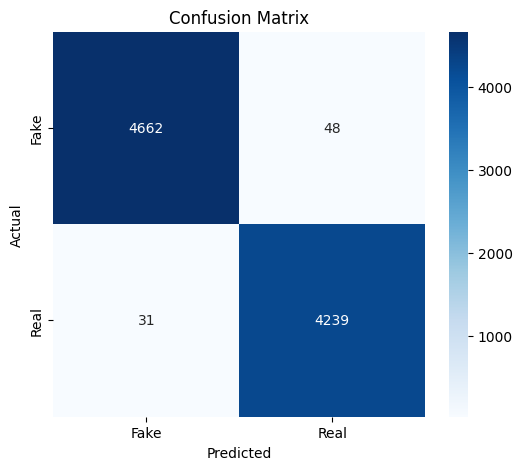

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-22-4019480303.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


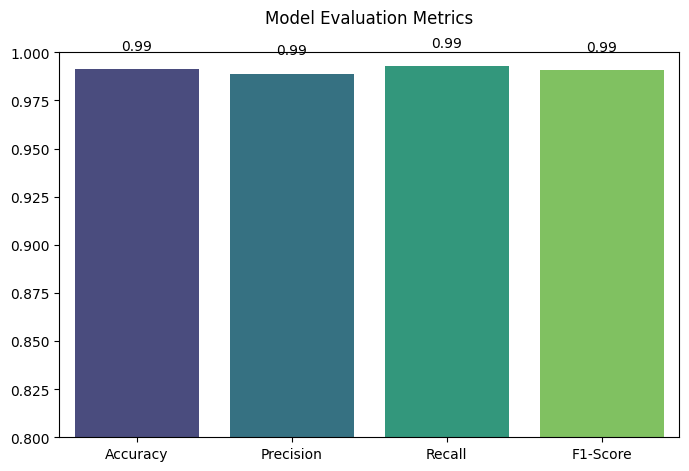

In [22]:
# Classification Metrics as Bar Chart
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Model Evaluation Metrics\")
plt.ylim(0.8, 1)
for i, val in enumerate(metrics.values()):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center')
plt.show()

In [29]:
import joblib

# Save the trained model
joblib.dump(model, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [28]:
test_news = [
    "Government Launches New Education Policy for Rural Areas",
    "Drinking Lemon Water Can Make You Invisible",
    "NASA Found Life on Mars",
    "Pakistan Prime Minister Signs Historic Peace Agreement"
]
for news in test_news:
    cleaned = [clean_text(news)]
    vector = tfidf.transform(cleaned)
    result = model.predict(vector)
    print(f"📰 \"{news}\" → Prediction: {'REAL' if result[0] == 1 else 'FAKE'}")


📰 "Government Launches New Education Policy for Rural Areas" → Prediction: FAKE
📰 "Drinking Lemon Water Can Make You Invisible" → Prediction: FAKE
📰 "NASA Found Life on Mars" → Prediction: FAKE
📰 "Pakistan Prime Minister Signs Historic Peace Agreement" → Prediction: REAL
